In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':100})
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_rain = pd.read_csv('Cumiliative Rainfall data.csv')

In [3]:
df_rain.head()

,DATE,ACTUAL RAINFALL (mm)
0,01-07-2018,7.81
1,02-07-2018,11.29
2,03-07-2018,11.73
3,04-07-2018,11.36
4,05-07-2018,9.34


In [4]:
df_rain.shape

(1097, 2)

In [5]:
df_rain.describe()

,ACTUAL RAINFALL (mm)
count,1097.000000
mean,7.709407
std,9.759295
min,0.000000
25%,0.970000
50%,4.060000
75%,11.460000
max,73.580000


In [6]:
df_wlevel = pd.read_csv('Cumiliative Water level data.csv')

In [7]:
df_wlevel.head()

,DATE,WATER LEVEL (m)
0,01-07-2018,233.52
1,02-07-2018,233.64
2,03-07-2018,233.58
3,04-07-2018,233.69
4,05-07-2018,233.81


In [8]:
df_wlevel.shape

(1097, 2)

In [9]:
df_wlevel.dropna().shape

(919, 2)

In [10]:
df_wlevel.describe()

,WATER LEVEL (m)
count,919.000000
mean,233.748814
std,0.387581
min,232.670000
25%,233.470000
50%,233.720000
75%,234.010000
max,234.960000


In [11]:
df = pd.merge(df_rain, df_wlevel.fillna(233.748814), how='outer', on=['DATE'])

In [12]:
df.head()

,DATE,ACTUAL RAINFALL (mm),WATER LEVEL (m)
0,01-07-2018,7.81,233.52
1,02-07-2018,11.29,233.64
2,03-07-2018,11.73,233.58
3,04-07-2018,11.36,233.69
4,05-07-2018,9.34,233.81


In [13]:
df.tail()

,DATE,ACTUAL RAINFALL (mm),WATER LEVEL (m)
1092,27-06-2021,9.88,234.26
1093,28-06-2021,6.77,234.13
1094,29-06-2021,5.00,234.24
1095,30-06-2021,6.26,234.08
1096,01-07-2021,9.28,233.65


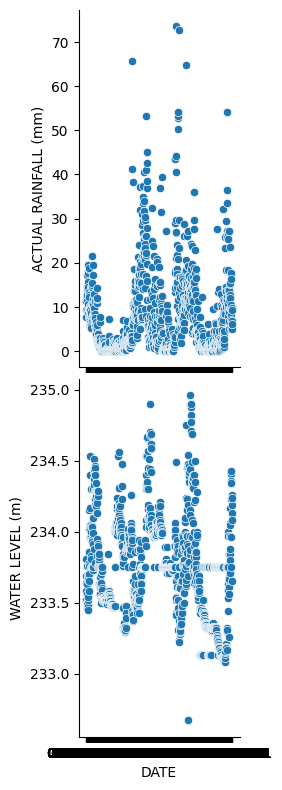

In [14]:
sns.pairplot(df, x_vars='DATE', y_vars=['ACTUAL RAINFALL (mm)','WATER LEVEL (m)'], size=4, aspect=0.7)

In [15]:
x = df.iloc[:, 1:2].values #X is rainfall
y = df.iloc[:, 2:3].values #Y is water level

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [19]:
print(lr.intercept_)

[233.70379187]


In [20]:
print(lr.coef_)

[[0.00649445]]


In [21]:
y_pred = lr.predict(x_test)

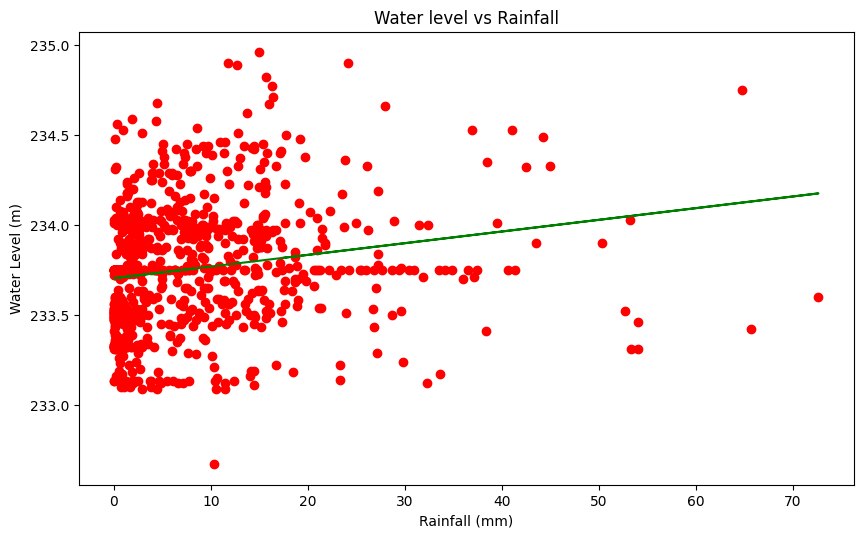

In [22]:
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, lr.predict(x_train), color = "green")
plt.title("Water level vs Rainfall")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Water Level (m)")
plt.show()

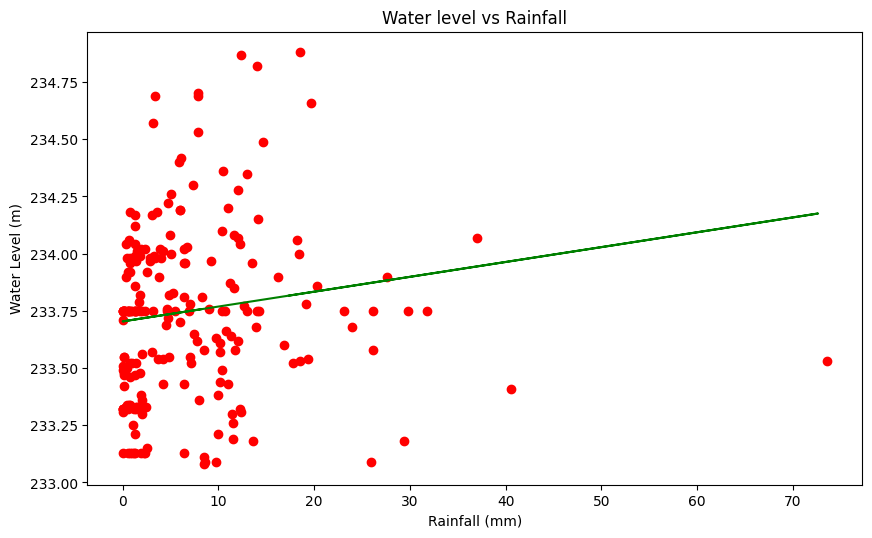

In [23]:
plt.scatter(x_test, y_test, color = "red")
plt.plot(x_train, lr.predict(x_train), color = "green")
plt.title("Water level vs Rainfall")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Water Level (m)")
plt.show()